# Computational Methods for Astrophysics, Homework #4, Askold Vilkha, Taylor Paul, Clive Binu

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from sympy import *

# Exercise 1, Adams-Bashforth method vs RK4 for 2 body Newtonian problem

In this problem, we are going to use Adams-Bashforth method to solve the 2 body Newtonian problem. We will compare the results with the RK4 method. We have alreasy used the RK4 method in the previous homework, so we will use the same code here. (`RK4_step`, `RK4_iterative`) Also, Newtonian 2-body problem is a reduced version of the 3-body problem, so we will slightly modify the code from the previous homework to solve the 2-body problem. Specifically, we will remove the third body from the corresponding function and modify the acceleration function accordingly.

Adams-Bashforth method is one of the multistep methods, so it may need several initial points to start the integration. We might use the previous Adams-Bashforth steps to generate next initial points from the given ones. However, it can significantly reduce accuracy, since every time we autogenerate the points, we introduce some error. So, we will use the RK4 method to generate the initial points for the Adams-Bashforth method. We will also compare the results obtained with auto-generated initial points and with the initial points obtained with the RK4 method to see how significant the introduced error is.

Adams-Bashforth method steps are defined as follows:
$$y_{n+1} = y_n + h f(t_n, y_n) ;\, \\
y_{n+2} = y_{n+1} + h \left( \frac{3}{2} f(t_{n+1}, y_{n+1}) - \frac{1}{2} f(t_n, y_n) \right) ;\, \\
y_{n+3} = y_{n+2} + h \left( \frac{23}{12} f(t_{n+2}, y_{n+2}) - \frac{4}{3} f(t_{n+1}, y_{n+1}) + \frac{5}{12} f(t_n, y_n) \right) ;\, \\
y_{n+4} = y_{n+3} + h \left( \frac{55}{24} f(t_{n+3}, y_{n+3}) - \frac{59}{24} f(t_{n+2}, y_{n+2}) + \frac{37}{24} f(t_{n+1}, y_{n+1}) - \frac{3}{8} f(t_n, y_n) \right) ;\, \\
y_{n+5} = y_{n+4} + h \left( \frac{1901}{720} f(t_{n+4}, y_{n+4}) - \frac{1387}{360} f(t_{n+3}, y_{n+3}) + \frac{109}{30} f(t_{n+2}, y_{n+2}) - \frac{637}{360} f(t_{n+1}, y_{n+1}) + \frac{251}{720} f(t_n, y_n) \right) ;\, \\
$$
Here, $y_n$ is the value of the function at the $n$-th step, $h$ is the step size, $f(t_n, y_n)$ is the derivative of the function at the $n$-th step. 

In our test case, we will use the 4-step method, since it has the same order of accuracy as the RK4 method. However, user still can choose the number of steps to use, as well as if the code should autogenerate the initial points or use the RK4 method to generate them.
Adams-Bashforth method is implemented in `Adams_Bashforth_step` function. Autogenerative method with option to choose RK4 or Adams-Bashforth algorithm for autogeneration is implemented in `Adams_Bashforth_autogenerative` function. Function `Adams_Bashforth_iterative` can be used to iterate the Adams-Bashforth method for the given interval and step size.

In [2]:
def Adams_Bashforth_step(func, t_0: float or list, y_0: float or list, h: float = 1e-3):
    '''
    This function completes a single step of the Adams-Bashforth method. User has to provide the initial values of the function and step size. 
    If multiple initial values are provided, the function assumes the length of the list to be equal to the number of steps.

    Parameters
    ----------
    func : function
        function to solve, dy/dt = func(t, y). Should be the function of two variables.
    t_0 : float or list
        initial value of t. If multiple initial values are provided, the function assumes the length of the list to be equal to the number of steps.
    y_0 : float or list
        initial value of y. If multiple initial values are provided, the function assumes the length of the list to be equal to the number of steps.
    h : float
        step size. The default is 1e-3.
    
    Returns
    -------
    t_res : float
        resulting value of t. Will be equal to the last value of `t_0` + h.
    y_res : float
        resulting value of y. Corresponds to the resulting value of `t_res`.

    Raises
    ------
    ValueError
        if `h` is not positive.
    TypeError
        if `t_0` and `y_0` are not of the same type.
    ValueError
        if the length of `t_0` and `y_0` is not equal.
    ValueError
        if the number of steps is not in range [1, 5].
    '''
    if h <= 0:
        raise ValueError(h, 'step size h should be positive')
    if type(t_0) != type(y_0):
        raise TypeError('t_0 and y_0 should be of the same type')
 
    # this block checks if the initial values input is valid and makes it possible to pass a single value
    try:
        if len(t_0) != len(y_0):
            raise ValueError('initial values should be of the same length')
    except TypeError:
        # TypeError will occur if t_0 and y_0 are not iterable, i. e. they are single values
        t_0 = [t_0]
        y_0 = [y_0]
    
    n_steps = len(y_0)
    if n_steps not in np.arange(1, 6):
        raise ValueError(n_steps, 'number of steps should be in range [1, 5]')
    
    
    # this block calculates the result depending on the desired number of steps
    t_res = t_0[-1] + h
    if n_steps == 1:
        y_res = y_0[0] + h * func(t_0[0], y_0[0])
    elif n_steps == 2:
        y_res = y_0[1] + h * (3/2 * func(t_0[1], y_0[1]) - 1/2 * func(t_0[0], y_0[0]))
    elif n_steps == 3:
        y_res = y_0[2] + h * (23/12 * func(t_0[2], y_0[2]) - 4/3 * func(t_0[1], y_0[1]) + 5/12 * func(t_0[0], y_0[0]))
    elif n_steps == 4:
        y_res = y_0[3] + h * (55/24 * func(t_0[3], y_0[3]) - 59/24 * func(t_0[2], y_0[2]) + 37/24 * func(t_0[1], y_0[1]) - 3/8 * func(t_0[0], y_0[0]))
    elif n_steps == 5:
        y_res = y_0[4] + h * (1901/720 * func(t_0[4], y_0[4]) - 1387/360 * func(t_0[3], y_0[3]) + 109/30 * func(t_0[2], y_0[2]) - 637/360 * func(t_0[1], y_0[1]) + 251/720 * func(t_0[0], y_0[0]))
    
    return t_res, y_res

In [3]:
def RK4_step(func, x_0: float, y_0: float, h: float = 1e-3):
    '''
    This function calculates a single step of the Runge-Kutta 4th order method.

    Parameters
    ----------
    func : function
        The function that defines the differential equation y' = f(x, y). Must require 2 arguments x, y.
    x_0 : float
        The initial value of x.
    y_0 : float
        The initial value of y.
    h : float
        The step size. Must be positive. The default is 1e-3.

    Returns
    -------
    x_1 : float
        The value of x at x_0 + h.
    y_1 : float
        The value of y at x_0 + h.

    Raises
    ------
    ValueError
        If `h` is not positive.
    '''
    if h <= 0:
        raise ValueError(h, 'step size h should be positive')

    # RK coefficients k1, k2, k3, k4
    k_1 = func(x_0, y_0)
    k_2 = func(x_0 + h / 2, y_0 + h * k_1 / 2)
    k_3 = func(x_0 + h / 2, y_0 + h * k_2 / 2)
    k_4 = func(x_0 + h, y_0 + h * k_3)

    # resulting approximation of the step
    x_1 = x_0 + h
    y_1 = y_0 + (h / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    return x_1, y_1

In [4]:
def RK4_iterative(func, bracket: list, x_0: float, y_0: float, h: float = 1e-3):
    '''
    This function solves the differential equation y' = f(x, y) using the Runge-Kutta 4th order method on the interval `[bracket[0], bracket[1]]` with step size `h`.

    Parameters
    ----------
    func : function
        The function that defines the differential equation y' = f(x, y). Must require 2 arguments x, y.
    bracket : list
        The interval of the solution.
    x_0 : float
        The initial value of x. 
    y_0 : float
        The initial value of y. If the user wants to work with vector function, this should be a np.array.
    h : float
        The step size. Must be positive. The default is 1e-3.
    
    Returns
    -------
    x_res : numpy.ndarray
        The array of x values.
    y_res : numpy.ndarray
        The array of y values.
    '''
    # initialize working variables
    n_steps = int((bracket[1] - bracket[0]) / h) + 1
    x_res = np.zeros(n_steps)
    # if the input for y_0 is a vector, the resulting array will have subarrays of the same shape for each step
    if type(y_0) == np.ndarray:
        shape = [n_steps]
        for i in range(len(y_0.shape)):
            shape.append(y_0.shape[i])
        y_res = np.zeros((shape))
    else:
        y_res = np.zeros(n_steps)

    # set initial values
    x_res[0] = x_0
    y_res[0] = y_0

    # main RK4 algorithm
    for i in range(1, n_steps):
        x_res[i], y_res[i] = RK4_step(func, x_res[i - 1], y_res[i - 1], h)

    return x_res, y_res

In [5]:
def RK4_adaptive(func, bracket: list, x_0: float, y_0: float, h: float = 1e-3, tol: float = 1e-10):
    '''
    This function solves the differential equation y' = f(x, y) using the adaptive Runge-Kutta 4th order method on the interval `[bracket[0], bracket[1]]`
    with step size `h` and tolerance `tol`. Needs to be provided with the initial values of x and y, and the interval of the solution.

    Parameters
    ----------
    func : function
        The function that defines the differential equation y' = f(x, y). Must require 2 arguments x, y.
    bracket : list
        The interval of the solution.
    x_0 : float
        The initial value of x.
    y_0 : float
        The initial value of y. If the user wants to work with vector function, this should be a np.array.
    h : float
        The step size. Must be positive. The default is 1e-3.
    tol : float
        The tolerance of the solution. Must be positive. The default is 1e-10.
    
    Returns
    -------
    x_res : numpy.ndarray
        The array of x values.
    y_res : numpy.ndarray
        The array of y values.
    err_res : numpy.ndarray
        The array of errors.

    Raises
    ------
    ValueError
        If `h` is not positive.
    ValueError
        If `tol` is not positive.
    '''
    if h <=  0:
        raise ValueError(h, r'Step size h must be positive!')
    if tol <= 0:
        raise ValueError(tol, r'Tolerance tol must be positive!')
    
    # set initial values
    x = x_0
    y = y_0
    error = tol * 2

    # initialize working arrays
    x_res = np.array([x])
    y_res = np.array([y])
    err_res = np.array([error])

    # main adaptive RK4 algorithm
    while x < bracket[1] and error > tol:
        # take one step with h and two steps with h / 2
        x_1, y_1 = RK4_step(func, x, y, h)
        x_2, y_2 = RK4_step(func, x, y, h / 2)
        x_2, y_2 = RK4_step(func, x_2, y_2, h / 2)

        # calculate the error
        error = np.linalg.norm(np.abs(y_1 - y_2))

        # if the error is too big, reduce the step size and try again
        if error > tol:
            h = h * (tol / error) ** 0.2

        # if the error is too small, increase the step size and try again
        elif error != 0 and np.log10(error) - np.log10(tol) < -3:
            h = h * (tol / error) ** 0.2
            error = tol * 2
            continue
        
        # if the error is acceptable, save the results and continue
        x_res = np.append(x_res, x_1)
        err_res = np.append(err_res, error)
        
        # append to y_array depending on the type of y_1
        y_res_shape = [len(y_res) + 1]
        for i in range(len(y_1.shape)):
            y_res_shape.append(y_1.shape[i])
        y_res = np.resize(y_res, y_res_shape)
        y_res[-1] = y_1

        # update the working variables
        x = x_1
        y = y_1
        error = tol * 2
    
    return x_res, y_res, err_res

In [6]:
def Adams_Bashforth_autogenerative(func, t_0: float or list, y_0: float or list, n_steps: int, h: float = 1e-3, autogen: str = None, return_grid: bool = False):
    '''
    This function completes one step of Adams-Bashforth method. User provides the arrays with initial values `t_0` and `y_0`, step size `h` and number of steps `n_steps`. 
    If the array of initial values contains less points than `n_steps`, the function can autogenerate the missing values depending on the `autogen` parameter. 
    Initial values `t_0` and `y_0` should be in the format `[t_0, t_1, t_2, t_3, t_4]` and `[y_0, y_1, y_2, y_3, y_4]` respectively. 

    Parameters:
    ----------
    func : function 
        function to solve, dy/dt = func(t, y). Should be the function of two variables.
    t_0 : float or list
        initial time. Can be a float or an array of floats. 
    y_0 : float or list
        initial value. Can be a float or an array of floats.
    n_steps : int
        number of steps, should be in range [1, 5]
    h : float
        step size. The default is 1e-3.
    autogen: str
        Can be 'RK4' or 'Adams_Bashforth'. If 'RK4' is provided, the function will use the Runge-Kutta method to autogenerate the missing values. 
        If 'Adams_Bashforth' is provided, the function will use the Adams-Bashforth method to autogenerate the missing values. The default is None. 
        If None is provided, the function will not autogenerate the missing values.
    return_grid : bool
        if True, the function will return the arrays of `t` and `y` values. The default is False. The resulting values will be appended to the initial arrays.
    
    Returns
    -------
    t_res : float
        resulting value of t at the desired step.
    y_res : float
        resulting value of y at the desired step.
    t : array
        array of t values. Returned only if `return_grid` is True. Contains the initial values of `t_0` and the resulting value of `t_res`.
    y : array
        array of y values. Returned only if `return_grid` is True. Contains the initial values of `y_0` and the resulting value of `y_res`.

    Raises
    ------
    ValueError
        if `n_steps` is not in range [1, 5].
    TypeError
        if `t_0` and `y_0` are not of the same type.
    ValueError
        if the length of `t_0` and `y_0` is not equal.
    ValueError
        if `autogen` is not 'RK4', 'Adams_Bashforth' or None.
    '''
    if n_steps not in np.arange(1, 6):
        raise ValueError(n_steps, 'number of steps should be in range [1, 5]')
    if type(t_0) != type(y_0):
        raise TypeError('t_0 and y_0 should be of the same type')
    try:
        if len(t_0) != len(y_0):
            raise ValueError('initial values should be of the same length')
        if len(y_0) != n_steps and autogen == None:
            raise ValueError(y_0, 'initial value should be a vector of length n_steps')
    except TypeError:
        if n_steps != 1:
            raise ValueError(y_0, 'initial value should be a vector of length n_steps')
        t_0 = [t_0]
        y_0 = [y_0]
    if autogen not in ['RK4', 'Adams_Bashforth', None]:
        raise ValueError(autogen, 'autogen should be either "RK4", "Adams_Bashforth" or None')
        
    # initialize working arrays
    t = np.zeros(n_steps)
    if type(y_0[0]) == np.ndarray:
        shape = [n_steps]
        for i in range(len(y_0[0].shape)):
            shape.append(y_0[0].shape[i])
        y = np.zeros((shape))
    else:
        y = np.zeros(n_steps)

    # autogenerate the missing values if needed
    if autogen == 'RK4':
        for i in range(n_steps):
            try:
                t[i] = t_0[i]
                y[i] = y_0[i]
            except IndexError:
            # if IndexError is raised, we reach the point where we need to autogenerate the missing values
                t[i], y[i] = RK4_step(func, t[i-1], y[i-1], h)
    elif autogen == 'Adams_Bashforth':
        for i in range(n_steps):
            try:
                t[i] = t_0[i]
                y[i] = y_0[i]
            except IndexError:
                t[i], y[i] = Adams_Bashforth_step(func, t_0, y_0, h)
                # we need to update the arrays of initial values so the next step of Adams-Bashforth method can be autogenerated
                t_0 = t[:i+1]
                y_0 = y[:i+1]
    else: 
        t = t_0
        y = y_0

    # calculate the result
    t_res, y_res = Adams_Bashforth_step(func, t, y, h)
    
    if return_grid:
        t = np.append(t, t_res)
        # we want to save the shape of y array if it is a vector
        new_shape = [n_steps + 1]
        for i in range(len(y.shape) - 1):
            new_shape.append(y.shape[i + 1])
        y = np.resize(y, (new_shape))
        y[-1] = y_res
        return t, y
    else:
        return t_res, y_res

In [7]:
def Adams_Bashforth_iterative(func, bracket: list, t_0: float or list, y_0: float or list, n_steps: int, autogen: str = None, h: float = 1e-3, n_in_points: int = 1):
    '''
    This function solves the differential equation y' = f(t, y) using the Adams-Bashforth method on the interval `[bracket[0], bracket[1]]` with step size `h`. 
    Needs as input the function, bracket, initial values `t_0` and `y_0`, number of steps `n_steps` and the number of initial values `n_in_points`.
    If the number of initial values is less than the number of steps, the function can autogenerate the missing values depending on the `autogen` parameter.

    Parameters
    ----------
    func : function
        function to solve, dy/dt = func(t, y). Should be the function of two variables.
    bracket : list
        the interval of the solution.
    t_0 : float or list
        initial time. Can be a float or an array of floats. Pass as list only if `n_in_points` is greater than 1.
    y_0 : float or list
        initial value. Can be a float or an array of floats. Pass as list only if `n_in_points` is greater than 1.
    n_steps : int
        number of steps, should be in range [1, 5]
    autogen: str
        Can be 'RK4' or 'Adams_Bashforth'. If 'RK4' is provided, the function will use the Runge-Kutta method to autogenerate the missing values. 
        If 'Adams_Bashforth' is provided, the function will use the Adams-Bashforth method to autogenerate the missing values. The default is None. 
        If None is provided, the function will not autogenerate the missing values.
    h : float
        step size. The default is 1e-3.
    n_in_points : int
        number of initial values. Should be in range [1, 5] and not greater than `n_steps`. The default is 1.
    
    Returns
    -------
    t_res : numpy.ndarray
        array of t values.
    y_res : numpy.ndarray
        array of y values.
    
    Raises
    ------
    ValueError
        if `n_in_points` is not in range [1, 5].
    ValueError
        if `n_in_points` is greater than `n_steps`.
    '''
    if n_in_points > n_steps:
        raise ValueError(n_in_points, 'number of initial values should be less than or equal to the number of steps') 
    if n_in_points not in np.arange(1, 6):
        raise ValueError(n_in_points, 'number of initial values should be in range [1, 5]')

    # initialize working arrays
    n_its = int((bracket[1] - bracket[0]) / h) + 1
    t_res = np.zeros(n_its)
    # we need to check if the input for y_0 is a vector
    if n_in_points != 1:
        y_0_test = y_0[0]
    else:
        y_0_test = y_0
    # depending on the input for y_0, the resulting array will have subarrays of the same shape for each step
    if type(y_0_test) == np.ndarray:
        shape = [n_its]
        for i in range(len(y_0_test.shape)):
            shape.append(y_0_test.shape[i])
        y_res = np.zeros((shape))
    else:
        y_res = np.zeros(n_its)
    
    # set initial values to be lists, so we use each point as a separate initial value
    t_0_new = [t_0]
    y_0_new = [y_0]
    for i in range(n_in_points - 1):
        y_0_new.append(y_0[i + 1])
        
    
    # check if there are enough initial values, if not - autogenerate them
    if n_in_points != n_steps:
        t_0_new, y_0_new = Adams_Bashforth_autogenerative(func, t_0_new, y_0_new, n_steps, h, autogen, return_grid = True)
    
    # at this point we have enough initial values to start the method, so we store them in the resulting arrays and start the method
    for i in range(n_steps):
        t_res[i] = t_0_new[i]
        y_res[i] = y_0_new[i]
    
    for i in range(n_steps, n_its):
        t_res[i], y_res[i] = Adams_Bashforth_step(func, t_res[i - n_steps:i], y_res[i - n_steps:i], h)
    
    return t_res, y_res

As a test case for our functions, we can solve a simple 1st order ODE, the same one that we used to test the RK4 method in the previous homework:
$$y' = 5y - 3, \quad y(2) = 1$$
The solution is $y = \frac{3}{5} + \frac{2}{5} e^{5(t-2)}$. We will use the same initial points as in the previous homework, $x_0 = 2, y_0 = 1$, our step size will be $h = 0.01$. We will integrate it on the interval $[2, 3]$, so that means using 100 steps. We will use the 4-step Adams-Bashforth method. Normally, we would need to know 4 initial points, but our function `Adams_Bashforth_autogenerative` will generate them for us. We will use both Adams-Bashforth method with autogenerative initial points and with initial points generated with the RK4 method and compare the results. The results are shown in Fig. 1.

In [8]:
def test_ode_sol(x):
    '''
    This function calculates the exact solution of the differential equation dy/dx = 5y - 3
    '''
    return 3/5 + 2/5 * np.exp(5 * (x - 2))

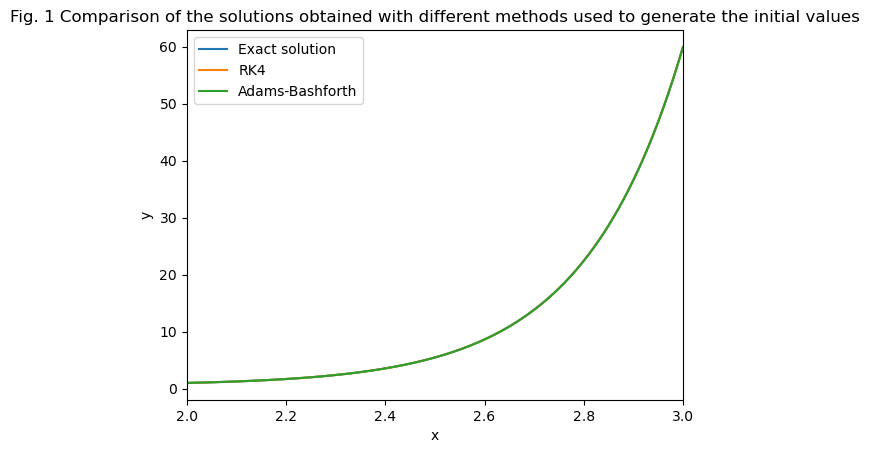

In [9]:
# test the Adams-Bashforth method with different methods to autogenerate the initial values
x_test_array_ab_rk4, y_test_array_ab_rk4 = Adams_Bashforth_iterative(func = lambda x, y: 5 * y - 3, bracket = [2, 3], t_0 = 2, y_0 = 1, h = 0.01, n_steps = 4, autogen = 'RK4', n_in_points = 1)
x_test_array_ab, y_test_array_ab = Adams_Bashforth_iterative(func = lambda x, y: 5 * y - 3, bracket = [2, 3], t_0 = 2, y_0 = 1, h = 0.01, n_steps = 4, autogen = 'Adams_Bashforth', n_in_points = 1)
# plot the results
x_test_array = np.linspace(2, 3, 101)
y_test_array = test_ode_sol(x_test_array)
plt.plot(x_test_array, y_test_array, label = 'Exact solution')
plt.plot(x_test_array_ab_rk4, y_test_array_ab_rk4, label = 'RK4')
plt.plot(x_test_array_ab, y_test_array_ab, label = 'Adams-Bashforth')
plt.xlim(2, 3)
plt.xlabel('x'); plt.ylabel('y')
plt.legend()
plt.title(r'Fig. 1 Comparison of the solutions obtained with different methods used to generate the initial values');

As we can see, the results are almost identical. The difference is so small that it is not visible on the plot. On this simple test case, the difference on how we obtain the initial points is not significant. However, on more complex problems, the difference can be more significant. However, this test proves that our code can solve ODEs with Adams-Bashforth method, so we can proceed to apply it to the actual 2 body Newtonian problem. To solidify the test, we also plot errors of the Adams-Bashforth method with autogenerative initial points and with initial points generated with the RK4 method. The errors are shown in Fig. 2.

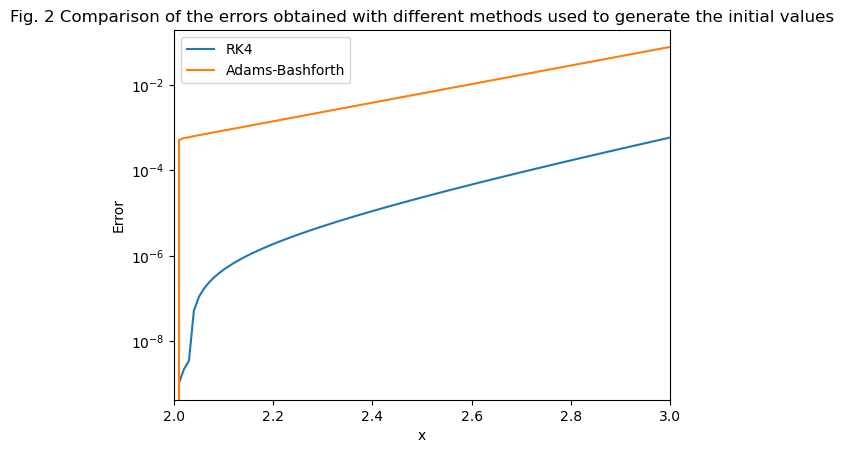

In [10]:
# plot the errors
plt.plot(x_test_array_ab_rk4, np.abs(y_test_array_ab_rk4 - y_test_array), label = 'RK4')
plt.plot(x_test_array_ab, np.abs(y_test_array_ab - y_test_array), label = 'Adams-Bashforth')
plt.xlim(2, 3); plt.yscale('log')
plt.xlabel('x'); plt.ylabel('Error')
plt.legend()
plt.title(r'Fig. 2 Comparison of the errors obtained with different methods used to generate the initial values');

In [11]:
# L_inf norm of the error
print(r'L_inf norm of the error for Adams-Bashforth if generating initial values using RK4: %e'%np.max(np.abs(y_test_array_ab_rk4 - y_test_array)))
print(r'L_inf norm of the error for Adams-Bashforth if generating initial values using Adams-Bashforth: %e'%np.max(np.abs(y_test_array_ab - y_test_array)))

L_inf norm of the error for Adams-Bashforth if generating initial values using RK4: 5.810080e-04
L_inf norm of the error for Adams-Bashforth if generating initial values using Adams-Bashforth: 7.687905e-02


This test shows that using Adams-Bashforth method to autogenerate the initial points is risky, since it introduces additional error, which is not negligible. It is 2 orders larger than if we generated the initial points using RK4. However, the error is still small, so in some cases Adams-Bashforth method can be used to autogenerate initial points. We will explore this further with the Newton 2 body problem.

Now, to define the 2 body problem in Newtonian gravity, we need to have the initial positions $r_1, r_2$ and masses $m_1, m_2$ of particles. From the Newtonian law of gravity: 
$$\vec{F} = -G \frac{m_1 m_2}{r^2} \hat{r}$$
and Newton's second law:
$$\vec{F} = m \vec{a}$$
we can obtain the following equations of motion:
$$\vec{a_1} = -G \frac{m_2}{r^2} \hat{r}  = -G \frac{m_2}{r^3} \vec{r_{12}};\, \\
\vec{a_2} = -G \frac{m_1}{r^3} \vec{r_{21}} = G \frac{m_1}{r^3} \vec{r_{12}}$$
This is implemented in the function `Newton_grav_acceleration`, which is the modified version of the similar function for 3 body problem from Homework #3.

In [12]:
def Newton_grav_acceleration(m_array, t: float, r_v_array, G: float = 1):
    '''
    This function calculates the acceleration of the bodies in the Newtonian gravitational field for 2 body problem case. 
    Needs as input the array of positions and velocities of the bodies and their masses.

    Parameters
    ----------
    t : float
        time. Not used in this function, but required for the integration algorithm.
    r_v_array : array
        array of positions and velocities of the bodies. Should be in the format `[[r_1, r_2], [v_1, v_2]]`. 
        Each subarray `r_1`, `r_2`, `v_1`, `v_2` should be a vector of length 3.
    m_array : array
        array of masses of the bodies. Should be in the format `[m_1, m_2]`.
    G : float
        gravitational constant. The default is 1.
    
    Returns
    -------
    v_a_array : array
        array of velocities and accelerations of the bodies. Returned in the format `[[v_1, v_2], [a_1, a_2]]`. 
        Each subarray `v_1`, `v_2`, `a_1`, `a_2` is a vector of length 3.
    '''
    # initialize the arrays
    a_array = np.zeros((2, 3))
    r_12 = np.zeros(3)
    r_array = r_v_array[0]
    v_array = r_v_array[1]

    # calculate the distance between the bodies and acceleration of each body
    r_12 = r_array[0] - r_array[1]
    a_array[0] = -G * m_array[1] * r_12 / np.power(np.linalg.norm(r_12), 3)
    a_array[1] = G * m_array[0] * r_12 / np.power(np.linalg.norm(r_12), 3)

    # for simplicity of the integrating algorithm, this function returns the array of velocities and accelerations as the first and second derivatives of the position
    v_a_array = np.array([v_array, a_array])
    return v_a_array

Now, we define our test case. Our system is quite simple. Initial positions are: $r_1 = (0, 0, 0), r_2 = (1, 0, 0)$, masses are $m_1 = 2, m_2 = 1$, initial velocities: $v_1 = (0, 0.5, 0), v_2 = (0, -1, 0)$. We will integrate it on the interval $[0, 10]$ with the step size $h = 0.01$. We will use RK4 algorithm and Adams-Bashforth algorithm with 4 steps to integrate it. We will also use Adams-Bashforth algorithm with 4 steps and autogenerative initial points. The results are shown in Fig. 3. 

In [13]:
# define the initial values
r_0 = np.array([[0, 0, 0], [1, 0, 0]])
v_0 = np.array([[0, .5, 0], [0, -1, 0]])
r_v_0 = np.array([r_0, v_0])
m_array = np.array([2, 1])

In [14]:
# since m_array is a positional argument, we will provide a modified function with a fixed m_array parameter to the integration algorithm
Newton_grav_acceleration_iterative = lambda t, r_v: Newton_grav_acceleration(m_array, t, r_v)
t_array_rk4, r_v_array_rk4 = RK4_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], x_0 = 0, y_0 = r_v_0, h = 0.01)

In [15]:
t_array_ab, r_v_array_ab = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, h = 0.01, n_steps = 4, autogen = 'Adams_Bashforth', n_in_points = 1)
t_array_ab_rk4, r_v_array_ab_rk4 = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, h = 0.01, n_steps = 4, autogen = 'RK4', n_in_points = 1)

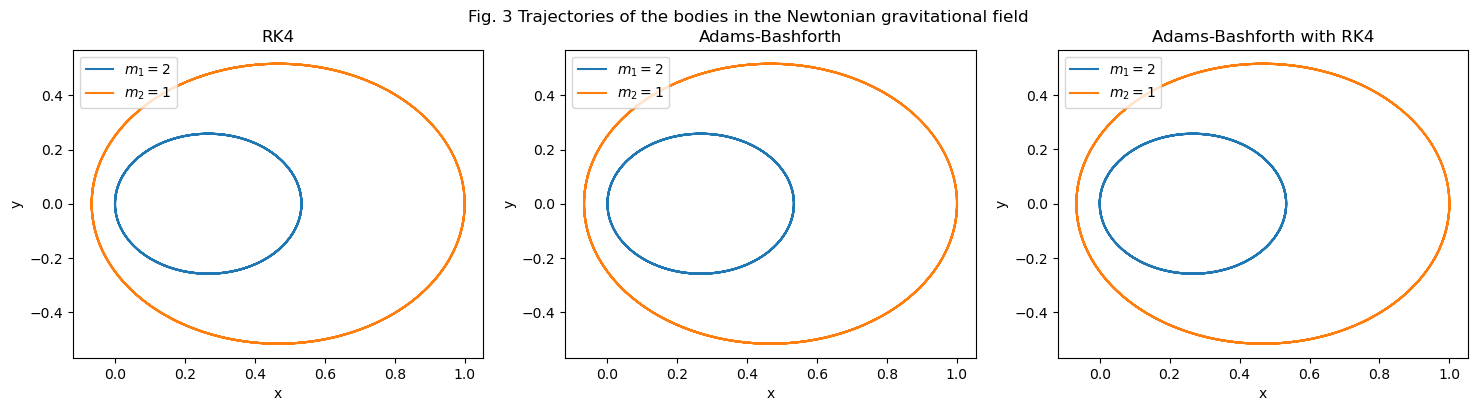

In [18]:
# prepare the data for plotting
r_array_rk4 = np.transpose(r_v_array_rk4, (1, 2, 3, 0))[0]
r_array_ab = np.transpose(r_v_array_ab, (1, 2, 3, 0))[0]
r_array_ab_rk4 = np.transpose(r_v_array_ab_rk4, (1, 2, 3, 0))[0]

# plot the results
fig, axs = plt.subplots(1, 3, figsize = (18, 4))

axs[0].plot(r_array_rk4[0][0], r_array_rk4[0][1], label = '$m_1 = 2$')
axs[0].plot(r_array_rk4[1][0], r_array_rk4[1][1], label = '$m_2 = 1$')
axs[0].set_xlabel('x'); axs[0].set_ylabel('y')
axs[0].set_title('RK4')
axs[0].legend()

axs[1].plot(r_array_ab[0][0], r_array_ab[0][1], label = '$m_1 = 2$')
axs[1].plot(r_array_ab[1][0], r_array_ab[1][1], label = '$m_2 = 1$')
axs[1].set_xlabel('x'); axs[1].set_ylabel('y')
axs[1].set_title('Adams-Bashforth')
axs[1].legend()

axs[2].plot(r_array_ab_rk4[0][0], r_array_ab_rk4[0][1], label = '$m_1 = 2$')
axs[2].plot(r_array_ab_rk4[1][0], r_array_ab_rk4[1][1], label = '$m_2 = 1$')
axs[2].set_xlabel('x'); axs[2].set_ylabel('y')
axs[2].set_title('Adams-Bashforth with RK4')
axs[2].legend()

fig.suptitle(r'Fig. 3 Trajectories of the bodies in the Newtonian gravitational field');

Visually, there is no difference. However, we can plot the relative errors. We will compare Adams-Bashforth methods with RK4 method. Remember that we use both RK4 and Adams-Bashforth methods to generate initial values for the integration. The results are shown in Fig. 4.

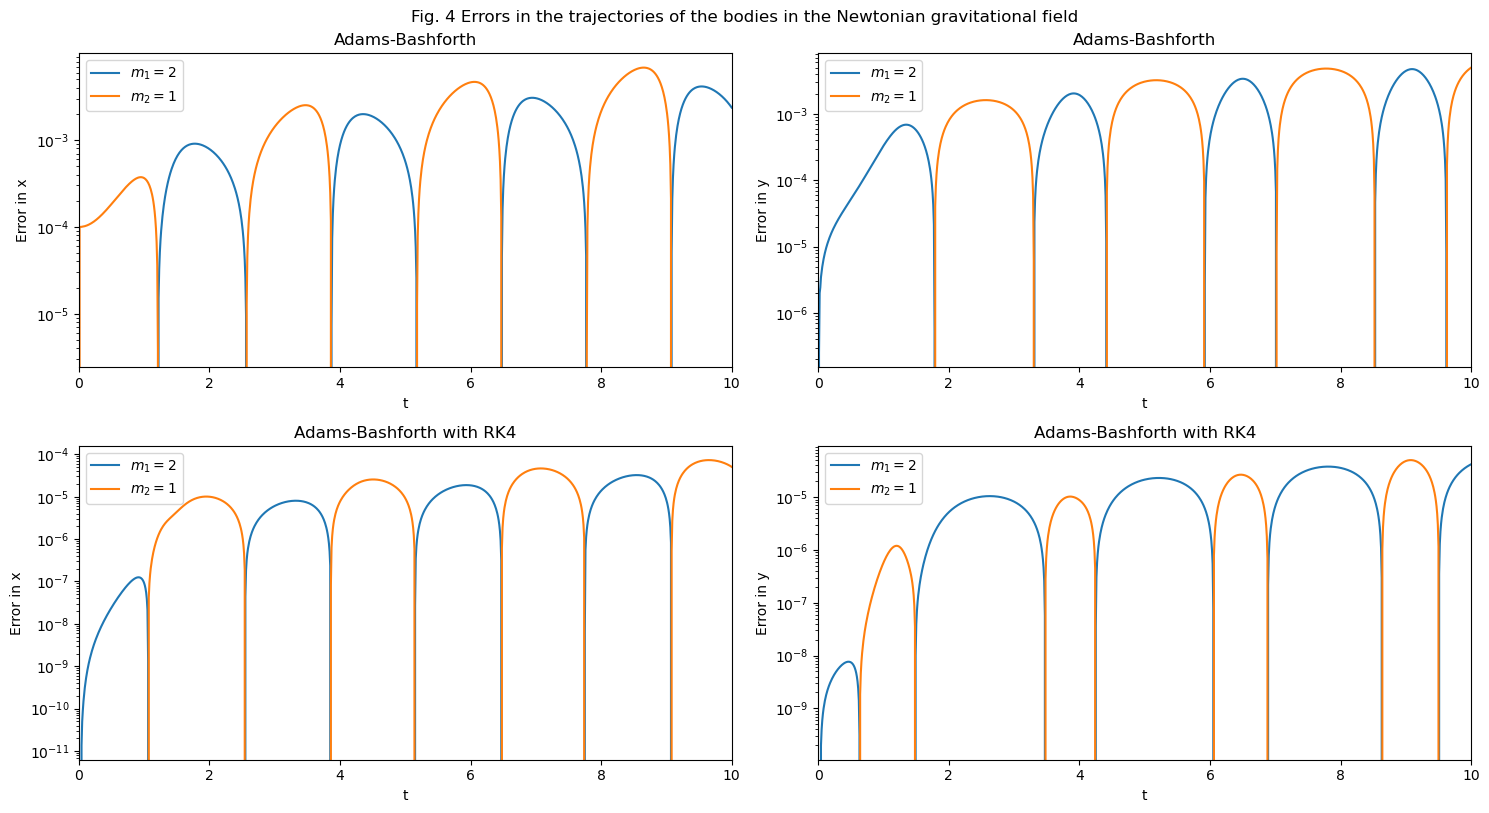

In [17]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

axs[0, 0].plot(t_array_rk4, r_array_ab[0][0] - r_array_rk4[0][0], label = '$m_1 = 2$')
axs[0, 0].plot(t_array_rk4, r_array_ab[1][0] - r_array_rk4[1][0], label = '$m_2 = 1$')
axs[0, 0].set_xlabel('t'); axs[0, 0].set_ylabel('Error in x')
axs[0, 0].set_xlim(0, 10); axs[0, 0].set_yscale('log')
axs[0, 0].set_title('Adams-Bashforth')
axs[0, 0].legend()

axs[0, 1].plot(t_array_rk4, r_array_ab[0][1] - r_array_rk4[0][1], label = '$m_1 = 2$')
axs[0, 1].plot(t_array_rk4, r_array_ab[1][1] - r_array_rk4[1][1], label = '$m_2 = 1$')
axs[0, 1].set_xlabel('t'); axs[0, 1].set_ylabel('Error in y')
axs[0, 1].set_xlim(0, 10); axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Adams-Bashforth')
axs[0, 1].legend()

axs[1, 0].plot(t_array_rk4, r_array_ab_rk4[0][0] - r_array_rk4[0][0], label = '$m_1 = 2$')
axs[1, 0].plot(t_array_rk4, r_array_ab_rk4[1][0] - r_array_rk4[1][0], label = '$m_2 = 1$')
axs[1, 0].set_xlabel('t'); axs[1, 0].set_ylabel('Error in x')
axs[1, 0].set_xlim(0, 10); axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Adams-Bashforth with RK4')
axs[1, 0].legend()

axs[1, 1].plot(t_array_rk4, r_array_ab_rk4[0][1] - r_array_rk4[0][1], label = '$m_1 = 2$')
axs[1, 1].plot(t_array_rk4, r_array_ab_rk4[1][1] - r_array_rk4[1][1], label = '$m_2 = 1$')
axs[1, 1].set_xlabel('t'); axs[1, 1].set_ylabel('Error in y')
axs[1, 1].set_xlim(0, 10); axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Adams-Bashforth with RK4')
axs[1, 1].legend()

plt.tight_layout()
fig.suptitle(r'Fig. 4 Errors in the trajectories of the bodies in the Newtonian gravitational field', y = 1.01);

From these plots, we can see that the relative error of the Adams-Bashforth method with autogenerative initial points is larger than the relative error of the Adams-Bashforth method with initial points generated with the RK4 method. The difference in maximum error is about 2 orders of magnitude. Therefore, it is better to use the RK4 method to generate initial points for the Adams-Bashforth method. Also, we can see that the relative error of the Adams-Bashforth method with initial points generated with the RK4 method to the actual RK4 method is not large, it is of order $10^{-5}$. Since the orbits generated by the Adams-Bashforth method and the RK4 method are visually identical, we can conclude that the Adams-Bashforth method is a good alternative to the RK4 method for the 2 body Newtonian problem. As our last test, we will compare the time efficiency of three methods. For that we will use built-in module `time`.

As a reference time efficiency, we will use adaptive RK4 method, that we have implemented in the previous homework. This can also serve as an additional test of our trajectories calculated with less accurate methods. We will use the same test case as in the previous test. The trajectories obtained with the adaptive RK4 method are shown in Fig. 5.

In [19]:
t_array_rk4_adapt, r_v_array_rk4_adapt, err_rk4_adapt = RK4_adaptive(func = Newton_grav_acceleration_iterative, bracket = [0, 10], x_0 = 0, y_0 = r_v_0, h = 0.01, tol = 1e-10)

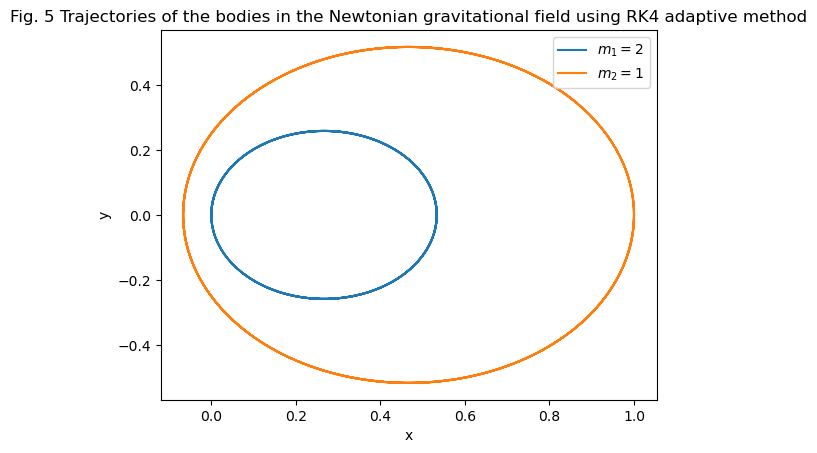

In [20]:
r_array_rk4_adapt = np.transpose(r_v_array_rk4_adapt, (1, 2, 3, 0))[0]
plt.plot(r_array_rk4_adapt[0][0], r_array_rk4_adapt[0][1], label = '$m_1 = 2$')
plt.plot(r_array_rk4_adapt[1][0], r_array_rk4_adapt[1][1], label = '$m_2 = 1$')
plt.xlabel('x'); plt.ylabel('y')
plt.legend()
plt.title(r'Fig. 5 Trajectories of the bodies in the Newtonian gravitational field using RK4 adaptive method');

As we can see, the trajectories seem to be identical to the ones obtained with the fixed step RK4 method. This shows that our other integration methods are accurate enough. Now, we will compare the time efficiency of the fixed step RK4 method, the Adams-Bashforth method with initial points generated with the RK4 method and the adaptive RK4 method.

In [26]:
start_time_adaptive_rk4 = time.time()
t_array_rk4_adapt, r_v_array_rk4_adapt, err_rk4_adapt = RK4_adaptive(func = Newton_grav_acceleration_iterative, bracket = [0, 10], x_0 = 0, y_0 = r_v_0, h = 0.01, tol = 1e-10)
end_time_adaptive_rk4 = time.time()
time_adaptive_rk4 = end_time_adaptive_rk4 - start_time_adaptive_rk4

start_time_rk4 = time.time()
t_array_rk4, r_v_array_rk4 = RK4_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], x_0 = 0, y_0 = r_v_0, h = 0.01)
end_time_rk4 = time.time()
time_rk4 = end_time_rk4 - start_time_rk4

start_time_ab = time.time()
t_array_ab, r_v_array_ab = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, n_steps = 4, autogen = 'Adams_Bashforth', n_in_points = 1, h = 0.01)
end_time_ab = time.time()
time_ab = end_time_ab - start_time_ab

start_time_ab_rk4 = time.time()
t_array_ab_rk4, r_v_array_ab_rk4 = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, n_steps = 4, autogen = 'RK4', n_in_points = 1, h = 0.01)
end_time_ab_rk4 = time.time()
time_ab_rk4 = end_time_ab_rk4 - start_time_ab_rk4

print('Time for RK4 adaptive method: %f'%time_adaptive_rk4)
print('Time for RK4 method: %f'%time_rk4)
print('Time for Adams-Bashforth method: %f'%time_ab)
print('Time for Adams-Bashforth method with RK4: %f'%time_ab_rk4)

Time for RK4 adaptive method: 0.547415
Time for RK4 method: 0.100355
Time for Adams-Bashforth method: 0.096488
Time for Adams-Bashforth method with RK4: 0.094364


As we can see, RK4 adaptive method takes the longest time, but it is because of the very small tolerance, if we decrease it to $10^{-5}$, it might be the fastest method and we test that below. RK4 method, Adams-Bashforth and Adams-Bashforth with autogenerative initial points are almost identical in time efficiency. Using Adams-Bashforth method with initial points generated with the RK4 method is the most accurate method. If one decides to use the 5-step Adams-Bashforth method instead of the 4-step one, it will be even more accurate, we will test that below. 

We can also see how the time efficiency of these methods changes with the step size. Results are shown in Fig. 5a.

In [22]:
h_time_test = np.power(10, np.linspace(-1, -5, 5))
t_time_test_rk4 = np.zeros(len(h_time_test))
t_time_test_ab = np.zeros(len(h_time_test))
t_time_test_ab_rk4 = np.zeros(len(h_time_test))

for i in range(5):
    start_time_rk4 = time.time()
    t_array_rk4, r_v_array_rk4 = RK4_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], x_0 = 0, y_0 = r_v_0, h = h_time_test[i])
    end_time_rk4 = time.time()
    t_time_test_rk4[i] = end_time_rk4 - start_time_rk4

    start_time_ab = time.time()
    t_array_ab, r_array_ab = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, n_steps = 4, autogen = 'Adams_Bashforth', n_in_points = 1, h = h_time_test[i])
    end_time_ab = time.time()
    t_time_test_ab[i] = end_time_ab - start_time_ab

    start_time_ab_rk4 = time.time()
    t_array_ab_rk4, r_array_ab_rk4 = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, n_steps = 4, autogen = 'RK4', n_in_points = 1, h = h_time_test[i])
    end_time_ab_rk4 = time.time()
    t_time_test_ab_rk4[i] = end_time_ab_rk4 - start_time_ab_rk4

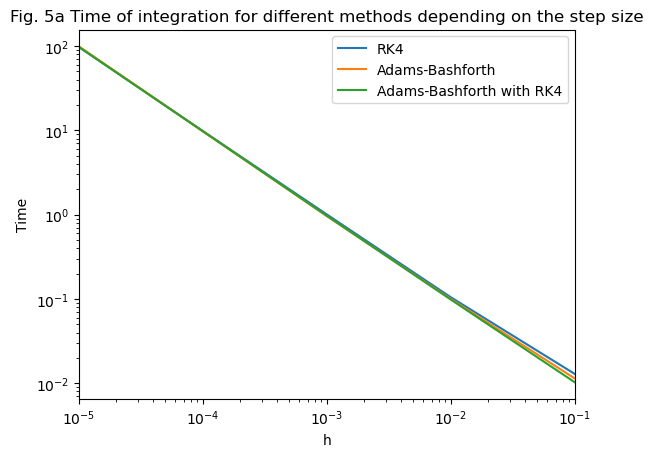

In [23]:
plt.plot(h_time_test, t_time_test_rk4, label = 'RK4')
plt.plot(h_time_test, t_time_test_ab, label = 'Adams-Bashforth')
plt.plot(h_time_test, t_time_test_ab_rk4, label = 'Adams-Bashforth with RK4')
plt.xlim(1e-5, 1e-1)
plt.xlabel('h'); plt.ylabel('Time')
plt.xscale('log'); plt.yscale('log')
plt.legend()
plt.title(r'Fig. 5a Time of integration for different methods depending on the step size');

As we can see, the differences are negligible. Also, if we increase the step size, the timing decreases as expected. Now we test the timing and accuracy for Adams-Bashforth method with 5 steps and compare it to the adaptive RK4 method with increased tolerance. 

In [24]:
start_time_adaptive_rk4 = time.time()
t_array_rk4_adapt, r_v_array_rk4_adapt, err_rk4_adapt = RK4_adaptive(func = Newton_grav_acceleration_iterative, bracket = [0, 10], x_0 = 0, y_0 = r_v_0, h = 0.01, tol = 1e-5)
end_time_adaptive_rk4 = time.time()
time_adaptive_rk4 = end_time_adaptive_rk4 - start_time_adaptive_rk4

start_time_ab5_rk4 = time.time()
t_array_ab5_rk4, r_v_array_ab5_rk4 = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, n_steps = 5, autogen = 'RK4', n_in_points = 1, h = 0.01)
end_time_ab5_rk4 = time.time()
time_ab5_rk4 = end_time_ab5_rk4 - start_time_ab5_rk4

start_time_ab5 = time.time()
t_array_ab5, r_v_array_ab5 = Adams_Bashforth_iterative(func = Newton_grav_acceleration_iterative, bracket = [0, 10], t_0 = 0, y_0 = r_v_0, n_steps = 5, autogen = 'Adams_Bashforth', n_in_points = 1, h = 0.01)
end_time_ab5 = time.time()
time_ab5 = end_time_ab5 - start_time_ab5

print('Time for RK4 adaptive method with tolerance 1e-5: %f'%time_adaptive_rk4)
print('Time for Adams-Bashforth method with RK4 and 5 steps: %f'%time_ab5_rk4)
print('Time for Adams-Bashforth method with 5 steps: %f'%time_ab5)

Time for RK4 adaptive method with tolerance 1e-5: 0.057923
Time for Adams-Bashforth method with RK4 and 5 steps: 0.121862
Time for Adams-Bashforth method with 5 steps: 0.120191


As we can see, if we increase tolerance to $10^{-5}$, the adaptive RK4 method becomes the fastest one. Also, using 5 steps of Adams-Bashforth method instead of 4 steps increases the computational cost and now it is more efficient to use RK4 to generate the initial points for the Adams-Bashforth method. This is beneficial both for accuracy and computational cost if one wants to reach the 5th order of accuracy. As our final test, we can compare the errors of the 5-step Adams-Bashforth method with initial points generated with the RK4 method and autogenerated initial points. The results are shown in Fig. 6

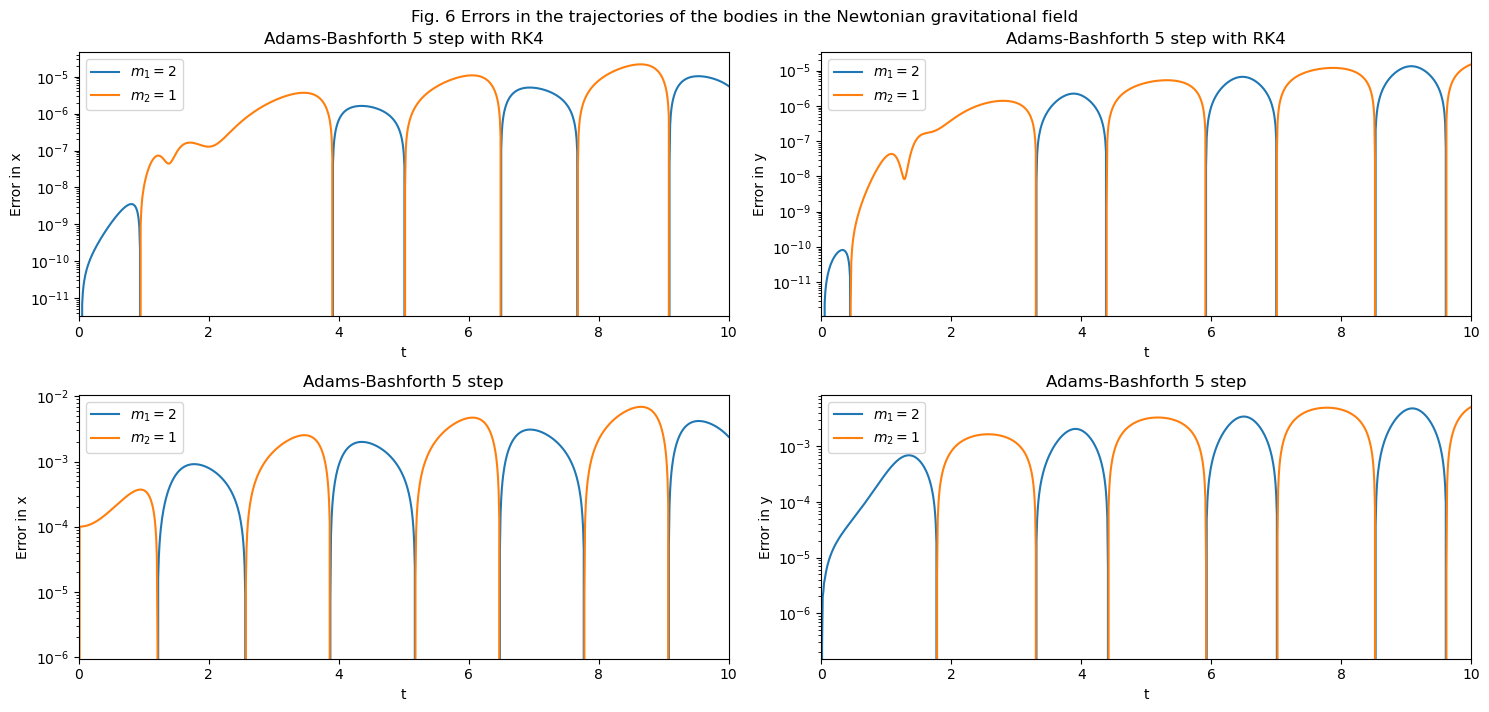

In [27]:
# transform the data for plots
r_array_ab5_rk4 = np.transpose(r_v_array_ab5_rk4, (1, 2, 3, 0))[0]
r_array_ab5 = np.transpose(r_v_array_ab5, (1, 2, 3, 0))[0]

# plot the results
fig, axs = plt.subplots(2, 2, figsize = (15, 7))

axs[0, 0].plot(t_array_rk4, r_array_ab5_rk4[0][0] - r_array_rk4[0][0], label = '$m_1 = 2$')
axs[0, 0].plot(t_array_rk4, r_array_ab5_rk4[1][0] - r_array_rk4[1][0], label = '$m_2 = 1$')
axs[0, 0].set_xlabel('t'); axs[0, 0].set_ylabel('Error in x')
axs[0, 0].set_xlim(0, 10); axs[0, 0].set_yscale('log')
axs[0, 0].set_title('Adams-Bashforth 5 step with RK4')
axs[0, 0].legend()

axs[0, 1].plot(t_array_rk4, r_array_ab5_rk4[0][1] - r_array_rk4[0][1], label = '$m_1 = 2$')
axs[0, 1].plot(t_array_rk4, r_array_ab5_rk4[1][1] - r_array_rk4[1][1], label = '$m_2 = 1$')
axs[0, 1].set_xlabel('t'); axs[0, 1].set_ylabel('Error in y')
axs[0, 1].set_xlim(0, 10); axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Adams-Bashforth 5 step with RK4')
axs[0, 1].legend()

axs[1, 0].plot(t_array_rk4, r_array_ab5[0][0] - r_array_rk4[0][0], label = '$m_1 = 2$')
axs[1, 0].plot(t_array_rk4, r_array_ab5[1][0] - r_array_rk4[1][0], label = '$m_2 = 1$')
axs[1, 0].set_xlabel('t'); axs[1, 0].set_ylabel('Error in x')
axs[1, 0].set_xlim(0, 10); axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Adams-Bashforth 5 step')
axs[1, 0].legend()

axs[1, 1].plot(t_array_rk4, r_array_ab5[0][1] - r_array_rk4[0][1], label = '$m_1 = 2$')
axs[1, 1].plot(t_array_rk4, r_array_ab5[1][1] - r_array_rk4[1][1], label = '$m_2 = 1$')
axs[1, 1].set_xlabel('t'); axs[1, 1].set_ylabel('Error in y')
axs[1, 1].set_xlim(0, 10); axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Adams-Bashforth 5 step')
axs[1, 1].legend()

plt.tight_layout()
fig.suptitle(r'Fig. 6 Errors in the trajectories of the bodies in the Newtonian gravitational field', y = 1.01);

The errors have significantly decreased if we use Adams-Bashforth method with 5 steps and generate initial points using RK4 method. If we autogenerate them using Adams-Bashforth method, the error stays approximately the same, since the order of error introduced by this autogeneration is larger than the order of error of the 5-step Adams-Bashforth method. Therefore, if one wants to reach 5th order of accuracy, it is better using RK4 method to generate initial points for the 5-step Adams-Bashforth method. It is beneficial both for accuracy and computational cost.

# Exercise 2, Gauss-Seidel iterations

For this exercise, we will use the Gauss-Seidel method to solve the following ODE (Poisson problem):
$$\nabla^2 \psi = -4 \pi \rho$$
The initial conditions are:
$$\frac{d\psi}{dr}|_{r = 1} = 0;\, \\
\psi(10) = 1;\, \\
\rho(r) = \frac{1}{r^4}$$
Here, we assume spherical symmetry, so Laplacian takes the following form:
$$\nabla^2 \psi = \frac{1}{r^2} \frac{d}{dr} \left( r^2 \frac{d\psi}{dr} \right) =
\frac{d^2 \psi}{dr^2} + \frac{2}{r}\frac{d\psi}{dr}$$
Thus, we can rewrite the Poisson problem as:
$$\frac{d^2 \psi}{dr^2} + \frac{2}{r}\frac{d\psi}{dr} = -4 \pi \rho = -\frac{4 \pi}{r^4};\, \\
\psi''(r) + \frac{2}{r} \psi'(r) = -\frac{4 \pi}{r^4}$$
For simplicity, we can replace $\psi(r)$ with $y(r)$, so we get the following system of equations:
$$y''(r) + \frac{2}{r} y'(r) = -\frac{4 \pi}{r^4}$$
Then we apply 2nd order accurate finite difference method to simplify the equation even more:
$$y''(r) \approx \frac{y_{i+1} - 2 y_i + y_{i-1}}{h^2};\, \\
y'(r) \approx \frac{y_{i+1} - y_{i-1}}{2h}$$
Here, $h$ is the step size. Then $y_{i-1} = y(r_i - h), \, y_i = y(r_i), \, y_{i+1} = y(r_i + h)$.
Reference: https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf. 
More on finite differencing in Homework #1.
$$\frac{y_{i+1} - 2 y_i + y_{i-1}}{h^2} + \frac{2}{r} \left(\frac{y_{i+1} - y_{i-1}}{2h} \right)= -\frac{4 \pi}{r^4};\, \\
\frac{r(y_{i+1} - 2 y_i + y_{i-1}) + h(y_{i+1} - y_{i-1})}{rh^2} = -\frac{4 \pi}{r^4};\, \\
r(y_{i+1} - 2 y_i + y_{i-1}) + h(y_{i+1} - y_{i-1}) = -\frac{4 \pi  h^2}{r^3}$$
Now, we can try to solve this equation for $y_{i}$:
$$y_{i} = \frac{r(y_{i+1} + y_{i-1}) + h(y_{i+1} - y_{i-1})}{2r} +\frac{2 \pi  h^2}{r^4};\, \\
y_{i} = \frac{y_{i+1} (r + h) + y_{i-1} (r - h)}{2r} + \frac{2 \pi  h^2}{r^4}$$



Gauss-Seidel method is desgined to solve systems of linear equations. In our case, we have system of $N$ equations, where $N$ is the number of grid points. In other words, for each point in the interval defined by the user, we have one equation. In matrix form, Gauss-Seidel method can be written as:
$$\mathbf{A} \mathbf{x} = \mathbf{b}$$
Here, matrices $\mathbf{A}$, $\mathbf{x}$ and $\mathbf{b}$ are defined as follows:
$$\mathbf{A} = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix};\, \quad
\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix};\, \quad
\mathbf{b} = \begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n
\end{bmatrix}
$$
In our case, $x$ is $y$, $b$ is the right hand side of the equation and $A$ is the matrix of coefficients. However, we have already solved the equation above for $y_i$, so at each step we will use the previous and next step values of $y$ to calculate the current step value. Therefore, to solve our ODE, we will find the values of $y_i$ for $n$ iterations or until the difference between the current and previous step values of $y_i$ for each point on the grid is less than the tolerance defined by the user. 
To improve the convergence of the algorithm, one can include the relaxation parameter $\omega$ in range $[0, 2]$, then the algorithm will update $y_i$ as follows:
$$y_i^{\text{new}} = \omega y_i^{\text{new}} + (1 - \omega) y_i^{\text{old}}$$
This algorithm is implemented in `Gauss_Seidel` function. Note, that this function is not general and is designed only to solve this specific problem!

In [28]:
def Gauss_Seidel(grid, ics: list, y_prime_left: float = None, y_prime_right: float = None, tol: float = 1e-10, iterations: int = 100, w: float = 1, verbose: bool = False):
    '''
    This function implements Gauss-Seidel algorithm to solve the equation y'' + 2/r * y' = -4 * pi / r^4 as a system of linear equations. 
    Algorithm is described in more detail in the markdown cell above. 
    Takes as input the grid, initial conditions (ics).

    Parameters
    ----------
    grid : numpy.ndarray
        grid of r values.
    ics : list
        initial conditions. Should be in the format `[y_0, y_1]`. 
        `y_0` is the value of the function at the first point of the grid, `y_1` is the value of the function at the second point of the grid.
        Should be floats.
    tol : float
        tolerance. The default is 1e-10. Must be positive.
    iterations : int
        maximum number of iterations. The default is 100.
    w : float
        relaxation parameter. The default is 1. Must be in range [0, 2].
    verbose : bool
        if True, prints the error and iteration number at each iteration. The default is False.

    Returns
    -------
    res_array : numpy.ndarray
        array of resulting values.
    error_array : numpy.ndarray
        array of errors.
    
    Raises
    ------
    ValueError
        if `ics` is not in the format `[y_0, y_1]`.
    ValueError
        if `tol` is not positive.
    ValueError
        if `iterations` is not positive.
    ValueError
        if `w` is not in range [0, 2].
    '''
    if len(ics) != 2:
        raise ValueError('initial conditions should be in the format [y_0, y_1]')
    if tol <= 0:
        raise ValueError('tolerance should be positive')
    if iterations < 1:
        raise ValueError('number of iterations should be positive')
    if w < 0 or w > 2:
        raise ValueError('relaxation parameter should be in range [0, 2]')


    # initialize necessary variables
    h = (grid[-1] - grid[0]) / len(grid) 
    it = 0
    error = tol * 2
    N_points = len(grid)
    iter_range = np.arange(1, N_points - 1)

    # initialize the arrays to store the resulting values and errors
    res_array = np.zeros(N_points)
    res_array[0] = ics[0]
    res_array[-1] = ics[1]
    error_array = np.zeros(N_points)


    # if the value of y_prime is provided, we have to update the initial conditions accordingly
    if y_prime_left != None:
        iter_range = np.arange(0, N_points - 1)
    if y_prime_right != None:
        iter_range = np.append(iter_range, N_points - 1)

    # the first loop will be used to repeat the algorithm until the error is less than the tolerance or maximum number of iterations is reached
    while it < iterations and error > tol:
        # this loop will be used to update the values of the resulting array after each step 
        # step is not iteration, since we need to update entire grid at each iteration
        for i in iter_range:
            res_old = res_array[i]

            # we try to access the values of the resulting array at i - 1 and i + 1, but if we're over the boundary, we use the initial conditions of prime function
            # we will reach i = 0 or i = N_points - 1 only if y_prime_left or y_prime_right are provided
            if i == 0:
                y_prev = res_array[i] - h * y_prime_left
                y_next = res_array[i + 1]
            elif i == N_points - 1:
                y_next = res_array[i] + h * y_prime_right
                y_prev = res_array[i - 1]
            else:
                y_prev = res_array[i - 1]
                y_next = res_array[i + 1]
            
            # for simplicity of the code, we express y_i as y_i = a + b
            # a here the first term in our equation for y_i and b is the second term
            a = ((grid[i] + h) * y_next + (grid[i] - h) * y_prev) / (2 * grid[i])
            b = (2 * np.pi * np.power(h, 2)) / np.power(grid[i], 4)
            res_new = a + b

            # update the value of the resulting array depending on the value of relaxation parameter w
            res_array[i] = w * res_new + (1 - w) * res_old
            error_array[i] = np.abs(res_array[i] - res_old)
        
        # calculate the maximum error
        error = np.max(error_array)
        it = it + 1

        # print the error and iteration number if verbose is True
        if verbose:
            print(r'error: %e at iteration: %i'%(error, it))

    return res_array, error_array

Now, we can test how the error would change with changing number of iterations. The results are shown in Fig. 7.

In [29]:
# initialize the grid and boundary conditions
r_grid = np.linspace(1, 10, 1024)
ics = [6.5, 1]
tol = 1e-6

In [30]:
# define a dictionary to store our results
test_gauss_seidel = {}
test_gauss_seidel['w = 1'] = {}
for n_it in [100, 200, 1000]:
    test_gauss_seidel['w = 1'][n_it] = Gauss_Seidel(r_grid, ics, y_prime_left = 0, tol = tol, iterations = n_it, w = 1, verbose = False)

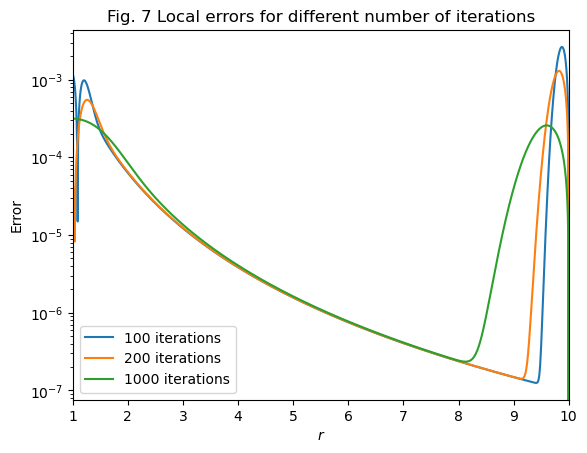

In [31]:
plt.plot(r_grid, test_gauss_seidel['w = 1'][100][1], label = '100 iterations')
plt.plot(r_grid, test_gauss_seidel['w = 1'][200][1], label = '200 iterations')
plt.plot(r_grid, test_gauss_seidel['w = 1'][1000][1], label = '1000 iterations')
plt.xlabel('$r$'); plt.ylabel('Error')
plt.xlim(1, 10); plt.yscale('log')
plt.legend()
plt.title(r'Fig. 7 Local errors for different number of iterations');

As we can see, the errors are the largest close to the boundaries. Also, if we plot the actual resulting function (Fig. 8), we can see that the errors peak around the largest values of the function. The erorrs decrease with increasing number of iterations too. Also, note that the number of iterations here was not sufficient for the solution to converge to the actual solution, so this plot is different from the ones presented later.

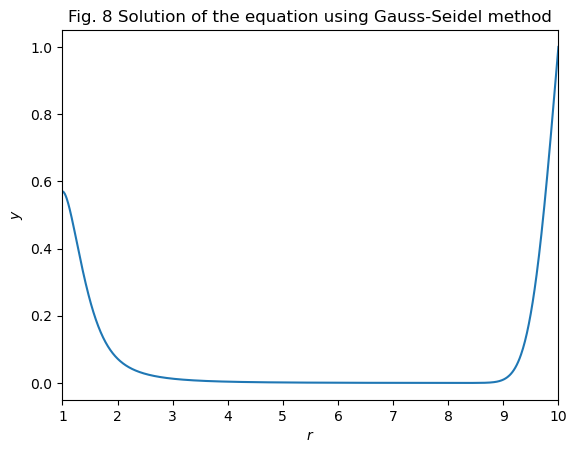

In [32]:
plt.plot(r_grid, test_gauss_seidel['w = 1'][1000][0])
plt.xlabel('$r$'); plt.ylabel('$y$')
plt.xlim(1, 10)
plt.title(r'Fig. 8 Solution of the equation using Gauss-Seidel method');

We can test how the error would change with changing the relaxation parameter $\omega$. The results for $\omega = 1.5$ are shown in Fig. 9.

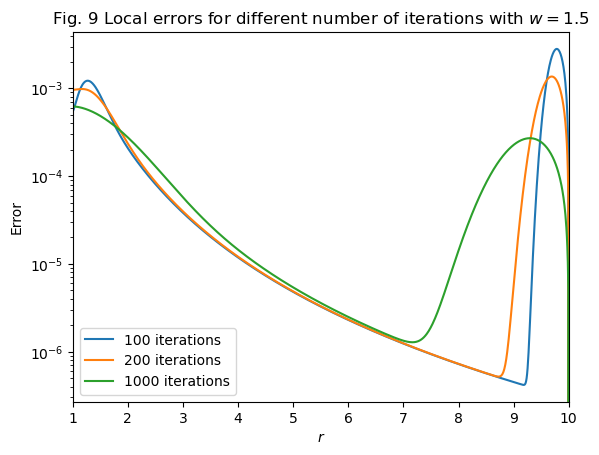

In [36]:
test_gauss_seidel['w = 1.5'] = {}
for n_it in [100, 200, 1000]:
    test_gauss_seidel['w = 1.5'][n_it] = Gauss_Seidel(r_grid, ics, y_prime_left = 0, tol = tol, iterations = n_it, w = 1.5, verbose = False)

plt.plot(r_grid, test_gauss_seidel['w = 1.5'][100][1], label = '100 iterations')
plt.plot(r_grid, test_gauss_seidel['w = 1.5'][200][1], label = '200 iterations')
plt.plot(r_grid, test_gauss_seidel['w = 1.5'][1000][1], label = '1000 iterations')
plt.xlabel('$r$'); plt.ylabel('Error')
plt.xlim(1, 10); plt.yscale('log')
plt.legend()
plt.title(r'Fig. 9 Local errors for different number of iterations with $w = 1.5$');

This is called overrelaxation (when $\omega$ is in $[1, 2]$). As we can see, the errors are more stable, but the smallest errors actually increased. Overrelaxation gives more weight to the current step value of $y_i$, so it is more stable, but it is not always beneficial. This could be useful if we want to decrease the number of iterations. For example, we want to obtain solution to some accuracy but computational cost is more important for us, or the system is too complicated. We can try to set $\omega$ to $0.5$ and see what happens. The results are shown in Fig. 10.

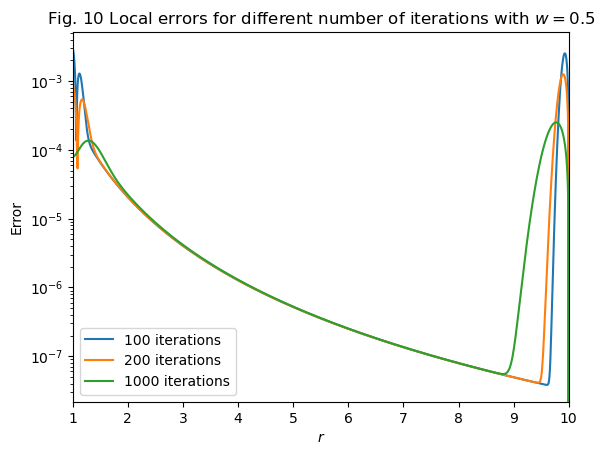

In [37]:
test_gauss_seidel['w = 0.5'] = {}
for n_it in [100, 200, 1000]:
    test_gauss_seidel['w = 0.5'][n_it] = Gauss_Seidel(r_grid, ics, y_prime_left = 0, tol = tol, iterations = n_it, w = 0.5, verbose = False)

plt.plot(r_grid, test_gauss_seidel['w = 0.5'][100][1], label = '100 iterations')
plt.plot(r_grid, test_gauss_seidel['w = 0.5'][200][1], label = '200 iterations')
plt.plot(r_grid, test_gauss_seidel['w = 0.5'][1000][1], label = '1000 iterations')
plt.xlabel('$r$'); plt.ylabel('Error')
plt.xlim(1, 10); plt.yscale('log')
plt.legend()
plt.title(r'Fig. 10 Local errors for different number of iterations with $w = 0.5$');

In case of our system, errors have not changed much, but in general, underrelaxation (when $\omega$ is in $[0, 1]$) can be useful to decrease the errors. 

Now we can use sympy to get the analytical solution to our ODE. We will use the same initial conditions as before. 
The solution is:
$$y(r) = \frac{12.5663706143592}{r} - \frac{6.28318530717959}{r^{2}} - 0.193805208364124$$

In [38]:
r_sym = Symbol('r')
y_sym = Function('y')

# define the equation
eq = Eq(y_sym(r_sym).diff(r_sym, 2) + 2 / r_sym * y_sym(r_sym).diff(r_sym), -4 * np.pi / r_sym**4)

# define the boundary conditions
ics_sym = {y_sym(r_sym).diff(r_sym, order = 1).subs(r_sym, 1): 0, y_sym(10): 1}

# solve the equation
sol = dsolve(eq, ics = ics_sym)
print(sol)

exact_sol =  lambdify(r_sym, sol.rhs)

Eq(y(r), 12.5663706143592*(r**(-1.0))**1.0 - 6.2831853071796*(r**(-1.0))**2.0 - 0.193805208364124)


Now that we have both numerical and analytical solutions, we can compare them. To improve the speed and the convergence of the algorithm, we will use overrelaxation, so $\omega = 1.99$. We will run the code for $10^4$ iterations or until the tolerance of $10^{-4}$ is reached The results are shown in Fig. 11. In fact, one can use other values for $\omega$ and tolerance, but it will take more time to get the algorithm to converge. Also, if you use the `y_prime_left` or `y_prime_right` argument in the `Gauss_Seidel` function, you can change the boundary condition that is defined with the derivative, it might take more time to converge but it will eventually reach the proper solution if you set your tolerance low enough. (lower than $10^{-4}$, for instance.)

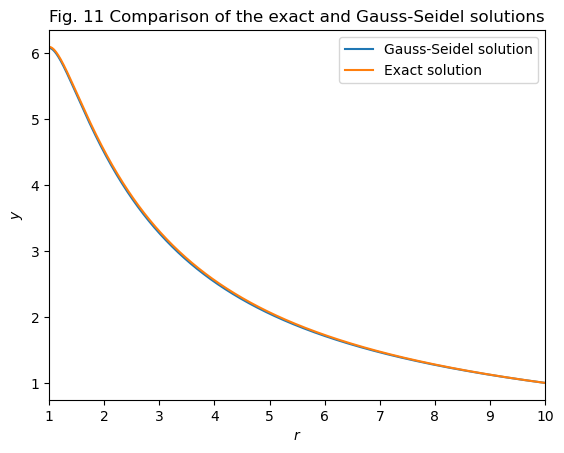

In [39]:
plt.plot(r_grid, Gauss_Seidel(r_grid, [0, 1], y_prime_left = 0, tol = 1e-4, iterations = 1e4, w = 1.99)[0], label = 'Gauss-Seidel solution')
plt.plot(r_grid, exact_sol(r_grid), label = 'Exact solution')
plt.xlim(1, 10)
plt.xlabel('$r$'); plt.ylabel('$y$')
plt.legend()
plt.title(r'Fig. 11 Comparison of the exact and Gauss-Seidel solutions');

Now we will test how the $L_{\infty}$ norm of the error changes with changing the size of the grid. We will experiment that on the interval $[32, 64, 128, 256, 512, 1024]$ points.

In [40]:
grid_size_test = np.power(2, np.arange(5, 11))
test_gauss_seidel['grid_test'] = {}
for grid_size in grid_size_test:
    r_grid_test = np.linspace(1, 10, grid_size)
    test_gauss_seidel['grid_test'][grid_size] = {}
    test_gauss_seidel['grid_test'][grid_size]['r_grid'] = r_grid_test 
    test_gauss_seidel['grid_test'][grid_size]['GS_sol'] = Gauss_Seidel(r_grid_test, [6.5, 1], y_prime_left = 0, tol = 1e-4, iterations = 1e5, w = 1.99)[0]
    test_gauss_seidel['grid_test'][grid_size]['exact_sol'] = exact_sol(r_grid_test)

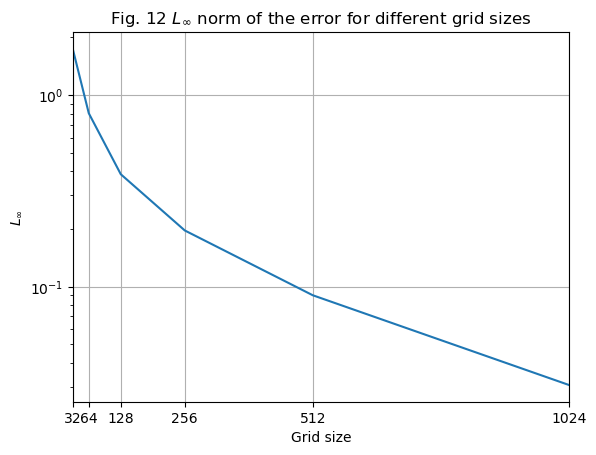

In [41]:
L_inf_gauss_seidel = np.zeros(len(grid_size_test))
for i in range(len(grid_size_test)):
    L_inf_gauss_seidel[i] = np.max(np.abs(test_gauss_seidel['grid_test'][grid_size_test[i]]['GS_sol'] - test_gauss_seidel['grid_test'][grid_size_test[i]]['exact_sol']))

plt.plot(grid_size_test, L_inf_gauss_seidel)
plt.xlabel('Grid size'); plt.ylabel('$L_{\infty}$')
plt.yscale('log')
plt.xlim(32, 1024)
plt.xticks(grid_size_test); plt.grid()
plt.title(r'Fig. 12 $L_{\infty}$ norm of the error for different grid sizes');

As we can see, the error decreases if we increase the number of points. That is exactly what we would expect from the algorithm, more grid points means that the algorithm recalculates the grid more times and reaches lower errors. However, it will take more time to run the algorithm. We can also see that the error is the largest when the exact function reaches maximum values, which is also expected. This is shown in Fig. 13.

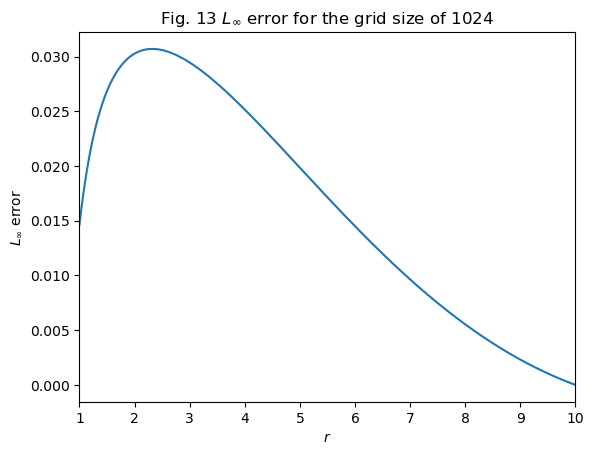

In [42]:
plt.plot(test_gauss_seidel['grid_test'][1024]['r_grid'], np.abs(test_gauss_seidel['grid_test'][1024]['GS_sol'] - test_gauss_seidel['grid_test'][1024]['exact_sol']))
plt.xlabel('$r$'); plt.ylabel('$L_{\infty}$ error')
plt.xlim(1, 10)
plt.title(r'Fig. 13 $L_{\infty}$ error for the grid size of 1024');